In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the three dataframes
refugee_df = pd.read_csv('Resources\demographic_ml_df.csv')
death_df = pd.read_csv('Resources\event_ml_df.csv')


Can we cluster Country of Origin with Country of Asylum to determine most likely destination for refugees? 

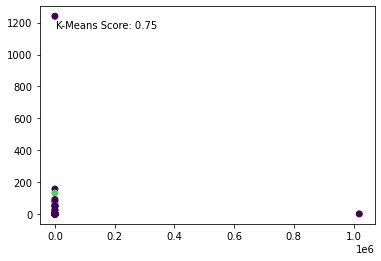

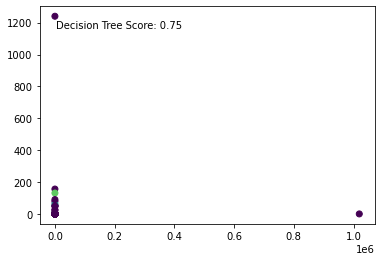

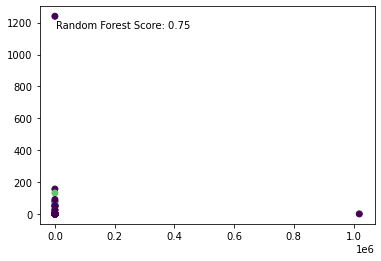

In [3]:
# Aggregate the values in duplicate entries using the sum function
c_df = refugee_df.groupby(['country_origin', 'country_asylum']).sum().reset_index()

X = c_df.pivot(index='country_origin', columns='country_asylum', values='total').fillna(0).values

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_score = silhouette_score(X, kmeans_labels)

# Apply Decision Tree clustering
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X, kmeans_labels)
dt_labels = dt.predict(X)
dt_score = silhouette_score(X, dt_labels)

# Apply Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, kmeans_labels)
rf_labels = rf.predict(X)
rf_score = silhouette_score(X, rf_labels)

# Plot the scatter chart
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.annotate(f"K-Means Score: {kmeans_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=dt_labels)
plt.annotate(f"Decision Tree Score: {dt_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=rf_labels)
plt.annotate(f"Random Forest Score: {rf_score:.2f}", xy=(0.05, 0.9), xycoords='axes fraction')
plt.show()



In [4]:
c_df

,country_origin,country_asylum,Unnamed: 0,year,share_borders,female_0to4,female_5to11,female_12to17,female_18to59,female_60,...,unknown_demographic,male_60,male_other,Male total,total,recognized_decisions,complementary_protection,rejected,otherwise_closed,total_decisions
0,Afghanistan,Albania,57607,2021,0,0,5,0,0,0,...,0,0,0,0,5,5.0,0.0,0.0,0.0,5.0
1,Afghanistan,Argentina,366034,16140,0,0,0,0,15,0,...,0,0,0,46,61,10.0,0.0,0.0,0.0,10.0
2,Afghanistan,Armenia,162392,6060,0,0,0,0,0,0,...,0,0,0,15,15,5.0,0.0,0.0,15.0,20.0
3,Afghanistan,Australia,560887,42231,0,0,0,0,0,0,...,165386,0,0,0,165386,16412.0,0.0,4229.0,175.0,20816.0
4,Afghanistan,Austria,560908,42231,0,0,0,0,0,0,...,299659,0,0,0,299659,30579.0,17385.0,15253.0,26431.0,89648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Zimbabwe,Thailand,183251,8065,0,0,0,0,0,0,...,0,0,0,31,31,25.0,0.0,0.0,0.0,25.0
4590,Zimbabwe,Turkey,50664,2018,0,0,0,0,6,0,...,0,0,0,0,6,5.0,0.0,0.0,0.0,5.0
4591,Zimbabwe,United Kingdom of Great Britain and Northern I...,622023,42231,0,0,0,0,0,0,...,163414,0,0,0,163414,15686.0,1586.0,42640.0,3592.0,63544.0
4592,Zimbabwe,United States of America,619829,40230,0,0,0,0,0,0,...,22559,0,0,0,22559,1982.0,5.0,1766.0,1331.0,5084.0


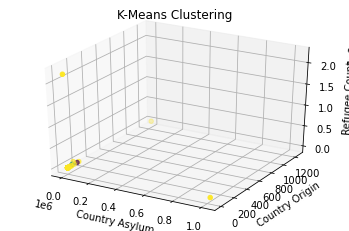

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels)
ax.set_xlabel('Country Asylum')
ax.set_ylabel('Country Origin')
ax.set_zlabel('Refugee Count')
plt.title('K-Means Clustering')
plt.show()